In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler

In [28]:
df=pd.read_excel("E:\\dwdm_pro\\new merged all.xlsx")
df['Gender'] = df['Gender'].replace({"Fale": "Female"})
df = df.drop(['Name', 'Hallticket number', 'Allotted college', 'Branch','Eamcet rank','eamcet marks','Coedu'], axis=1)
df.head()

,Gender,State,District,region,Intermediate_marks,Eamcet year,status
0,Male,Andhra Pradesh,Krishna,Middle Andhra,989.0,2020.0,Qualified
1,Male,Andhra Pradesh,East Godavari,Middle Andhra,988.0,2020.0,Qualified
2,Male,Andhrapradesh,East Godavari,Middle Andhra,954.0,2020.0,Qualified
3,Female,Andhrapradesh,East Godavari,Middle Andhra,987.0,2020.0,Qualified
4,Male,Andhrapradesh,Visakhapatnam,North Andhra,987.0,2020.0,Qualified


In [29]:
# Fill missing values with 0 for 'Intermediate_marks', 'Eamcet year', and 'eamcet marks'
df['Intermediate_marks'].fillna(0, inplace=True)
df['Eamcet year'].fillna(0, inplace=True)
# Convert 'Gender' and 'status' columns to numeric
df['Gender'] = df['Gender'].replace({"Male": 1, "Female": 0})
df['status'] = df['status'].replace({"Qualified": 1, "Not Qualified": 0})
df.head()

,Gender,State,District,region,Intermediate_marks,Eamcet year,status
0,1.0,Andhra Pradesh,Krishna,Middle Andhra,989.0,2020.0,1.0
1,1.0,Andhra Pradesh,East Godavari,Middle Andhra,988.0,2020.0,1.0
2,1.0,Andhrapradesh,East Godavari,Middle Andhra,954.0,2020.0,1.0
3,0.0,Andhrapradesh,East Godavari,Middle Andhra,987.0,2020.0,1.0
4,1.0,Andhrapradesh,Visakhapatnam,North Andhra,987.0,2020.0,1.0


In [30]:
# Drop rows with missing target variable ('status')
df.dropna(subset=['status'], inplace=True)

In [31]:
# Perform one-hot encoding for 'District', 'State', and 'region' columns
df_encoded = pd.get_dummies(df, columns=['District', 'State', 'region'], drop_first=True)
df_encoded.head()

,Gender,Intermediate_marks,Eamcet year,status,District_Chittoor,District_East Godavari,District_Guntur,District_Krishna,District_Kurnool,District_Nellore,...,District_Srikakulam,District_Visakhapatnam,District_Vizianagaram,District_West Godavari,District_YSR Kadapa,District_guntur,State_Andhrapradesh,region_North Andhra,region_Rayalaseema,region_South Andhra
0,1.0,989.0,2020.0,1.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,988.0,2020.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,954.0,2020.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.0,987.0,2020.0,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1.0,987.0,2020.0,1.0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [32]:
# Define the features (X) and the target (y)
X = df_encoded.drop(['status'], axis=1)
y = df_encoded['status']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Initialize and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [34]:
# Make predictions on the test set for logistic regression
y_pred_logistic = logistic_model.predict(X_test)
# Calculate accuracy and print the classification report for logistic regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", accuracy_logistic,"\nError percentage:",1-accuracy_logistic)
print(classification_report(y_test, y_pred_logistic))

Logistic Regression Accuracy: 0.9838926174496644 
Error percentage: 0.016107382550335614
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94       108
         1.0       0.98      1.00      0.99       637

    accuracy                           0.98       745
   macro avg       0.99      0.94      0.97       745
weighted avg       0.98      0.98      0.98       745



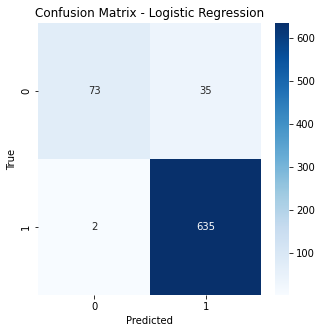

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Assuming 'y_test' and 'y_pred_logistic' are already defined

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


